In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions

device = 'cuda' if torch.cuda.is_available() else 'cpu'

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import adjusted_rand_score
from sklearn import preprocessing

import seaborn as sns

import anndata
import scanpy

import pandas as pd
import copy

from sklearn.preprocessing import normalize

from importlib import reload

/n/fs/ragr-data/users/uchitra/miniconda3/envs/belayer2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import sys
sys.path.append('/n/fs/ragr-research/projects/SpatialNN')
from SpatialNN import SpatialNN, train

import dp_related
import segmented_fit
import binning_and_plotting
import spatial_gene_classification
import plot_cell_types

# olfactory layers

In [15]:
# load data, model

folder='/n/fs/ragr-research/projects/network-mutations/manifold-alignment/olfactory_glmpca/'

counts_mat=np.load(folder+f'count_mat_lower.npy')
counts_mat=counts_mat.T
coords_mat=np.load(folder+f'coords_mat_lower.npy')
gene_labels=np.load(folder+f'gene_labels.npy',allow_pickle=True)
gene_labels=np.array([t.lower() for t in gene_labels])

nhS=50 # USE THIS - best looking layers
partition='lower'
optimizer='adam'
trial=3

folder='/n/fs/ragr-research/projects/network-mutations/manifold-alignment/olfactory_glmpca/intermediate_NN_v2/'
folder+=f'nhS_{nhS}_optimizer_{optimizer}_partition_{partition}_trial_{trial}/'

mod=torch.load(folder+'model_epoch_20000.pt')

A_torch=torch.load(folder+'Atorch.pt')
A=A_torch.numpy()

S_torch=torch.load(folder+'Storch.pt')
S=S_torch.detach().numpy()

num_layers=7
belayer_depth, belayer_labels=dp_related.get_depth_labels(mod,A,S,num_layers)
belayer_depth=100*belayer_depth

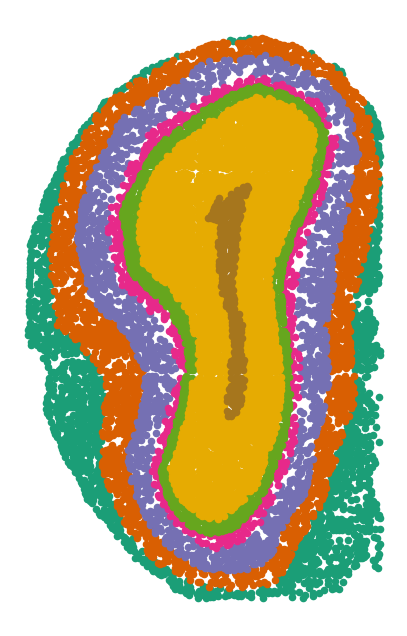

In [16]:
# plot layers
# LAYERS OF NEW MODEL SHOULD LOOK LIKE THIS
reload(dp_related)

S2=dp_related.rotate_by_theta(S, -1*np.pi/2)
S2[:,1]=-1*S2[:,1]

dp_related.plot_clusters(belayer_labels, A, S2)

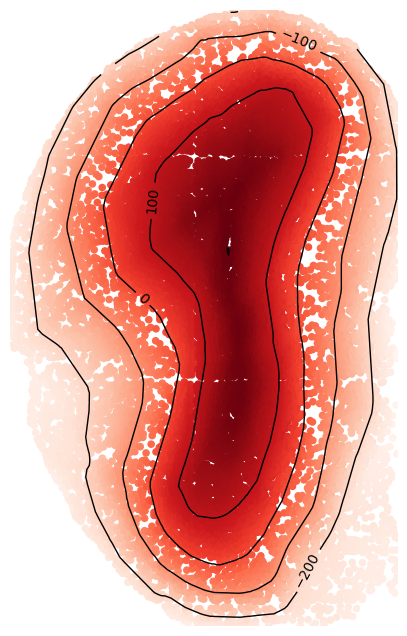

In [18]:
# reload(dp_related)
dp_related.plot_depth(belayer_depth, S2)

# cerebellum  layers

In [19]:
rep=1
folder='/n/fs/ragr-research/projects/network-mutations/manifold-alignment/slideseq_cerebellum/'

counts_mat=np.load(folder+f'counts_mat_rep{rep}.npy')
coords_mat=np.load(folder+f'coords_mat_rep{rep}.npy')
gene_labels=np.load(folder+f'gene_labels_rep{rep}.npy',allow_pickle=True)
gene_labels=np.array([t.lower() for t in gene_labels])

nhS=200
trial=0
optimizer='adam'
partition='all'

folder='/n/fs/ragr-research/projects/network-mutations/manifold-alignment/slideseq_cerebellum/intermediate_NN_v2/'
folder+=f'nhS_{nhS}_optimizer_{optimizer}_partition_{partition}_trial_{trial}/'

cell_types=np.load('/n/fs/ragr-research/projects/network-mutations/manifold-alignment/slideseq_cerebellum/cell_types_ALL.npy',allow_pickle=True)

# mod=torch.load(folder+'final_model.pt')
mod=torch.load(folder+'model_epoch_20000.pt')

A_torch=torch.load(folder+'Atorch.pt')
A=A_torch.numpy()

S_torch=torch.load(folder+'Storch.pt')
S=S_torch.detach().numpy()

num_layers=4
belayer_depth, belayer_labels=dp_related.get_depth_labels(mod,A,S,num_layers)

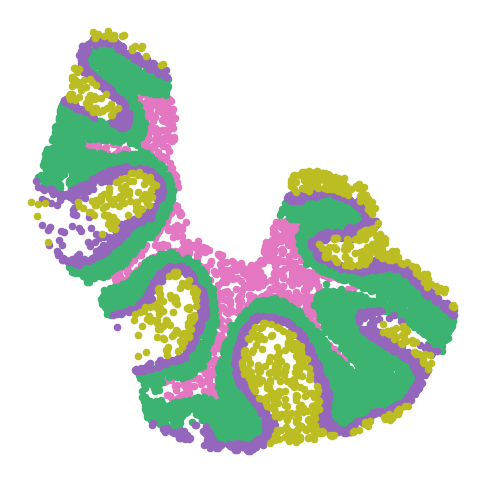

In [22]:
# plot layers
# LAYERS OF NEW MODEL SHOULD LOOK LIKE THIS

colors=np.array(['C6', 'mediumseagreen', 'C4', 'C8'])

dp_related.plot_clusters(belayer_labels, A, S, figsize=(6,6), colors=colors)

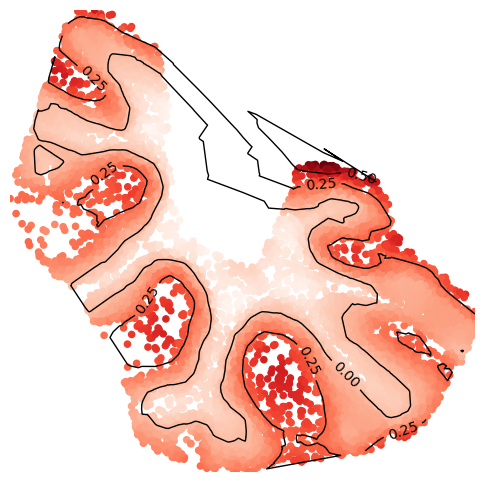

In [24]:
dp_related.plot_depth(belayer_depth, S, figsize=(6,6), contour_levels=3)